# Module 4 Statistical Modeling

## Linear Regression Model

In [16]:
import numpy as np
import pandas as pd

x = np.linspace(-5, 5, 20)
y = -5 + 3*x + np.random.normal(size=x.shape)
data = pd.DataFrame({'x': x, 'y': y})

In [17]:
data

,x,y
0,-5.000000,-18.876553
1,-4.473684,-19.138417
2,-3.947368,-16.507407
3,-3.421053,-15.445089
4,-2.894737,-14.682483
5,-2.368421,-10.054231
6,-1.842105,-10.338258
7,-1.315789,-10.460614
8,-0.789474,-5.655533
9,-0.263158,-5.275677


In [18]:
# import statsmodels.formula.api as sm
# model = sm.ols("y ~ x", data).fit()

In [19]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1218.
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           5.49e-18
Time:                        14:38:44   Log-Likelihood:                -30.207
No. Observations:                  20   AIC:                             64.41
Df Residuals:                      18   BIC:                             66.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7866      0.258    -18.533      0.000      -5.329      -4.244
x              2.9704      0.085     34.905      0.000       2.792       3.149
==============================================================================
Omnibus:                        0.241   Durbin-Watson:                   2.421
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.097
Skew:                           0.143   Prob(JB):                        0.952
Kurtosis:                       2.814   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.params

Intercept   -4.786623
x            2.970421
dtype: float64

In [22]:
model.params[0]

-4.78662343890462

In [23]:
model.params[1]

2.9704214140782303

In [24]:
a = model.params[0]
b = model.params[1]

yhat = a + b*x
yhat

array([-19.63873051, -18.07535082, -16.51197113, -14.94859143,
       -13.38521174, -11.82183205, -10.25845236,  -8.69507267,
        -7.13169298,  -5.56831328,  -4.00493359,  -2.4415539 ,
        -0.87817421,   0.68520548,   2.24858517,   3.81196487,
         5.37534456,   6.93872425,   8.50210394,  10.06548363])

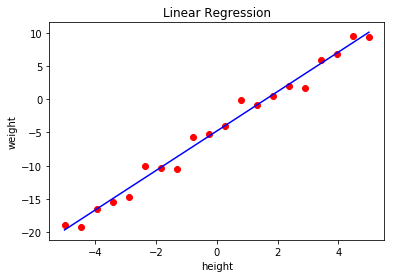

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'or')
plt.plot(x,yhat,'b')
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Linear Regression')
plt.show()

## Ex: Linear Regression Model

In [27]:
import pandas as pd
mtcars = pd.read_csv('./data/mtcars.csv')
# mtcars = pd.read_csv('data/mtcars.csv')

In [29]:
# mtcars

In [32]:
model = ols("mpg ~ wt", mtcars).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           1.29e-10
Time:                        14:41:38   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.params

Intercept    37.285126
wt           -5.344472
dtype: float64

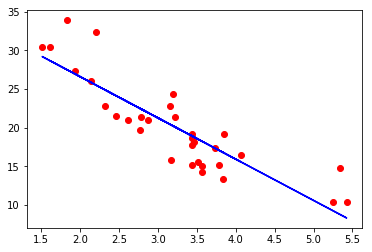

In [44]:
a = model.params[0]
b = model.params[1]
yhat = a + b*mtcars.wt
# yhat = a + b*mtcars['wt']

plt.plot(mtcars['wt'],mtcars['mpg'],'or')
# mtcars.plot.scatter('wt','mpg')
plt.plot(mtcars.wt,yhat,'b')

In [35]:
# model.predict(mtcars)

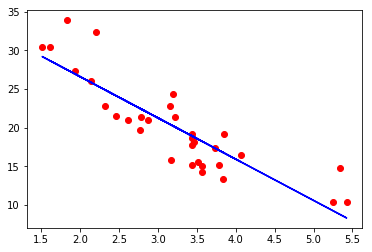

In [17]:
plt.plot(mtcars['wt'],mtcars['mpg'],'or')
plt.plot(mtcars.wt,model.predict(mtcars),'b')

## Multi Regression Model

In [47]:
model = ols("mpg ~ wt+am", mtcars).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     44.17
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           1.58e-09
Time:                        14:24:14   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      29   BIC:                             170.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3216      3.055     12.218      0.000      31.074      43.569
wt            -5.3528      0.788     -6.791      0.000      -6.965      -3.741
am            -0.0236      1.546     -0.015      0.988      -3.185       3.138
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.413
Skew:                           0.670   Prob(JB):                        0.299
Kurtosis:                       2.881   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params

Intercept    37.321551
wt           -5.352811
am           -0.023615
dtype: float64

In [21]:
model.predict(mtcars)

0     23.273570
1     21.908603
2     24.879414
3     20.112263
4     18.907880
5     18.800824
6     18.212014
7     20.246083
8     20.460195
9     18.907880
10    18.907880
11    15.535609
12    17.355565
13    17.087924
14     9.219291
15     8.287902
16     8.710774
17    25.521751
18    28.653146
19    27.475527
20    24.126871
21    18.479655
22    18.934644
23    16.766755
24    16.739991
25    26.940246
26    25.842920
27    29.199132
28    20.329524
29    22.470648
30    18.188399
31    22.417120
dtype: float64

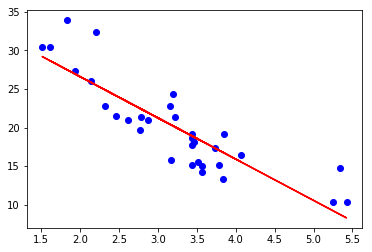

In [64]:
# mtcars.plot.scatter('wt','mpg')
plt.plot(mtcars.wt, mtcars.mpg,'ob')
plt.plot(mtcars.wt, model.predict(mtcars),'r')

Text(0, 0.5, 'mpg')

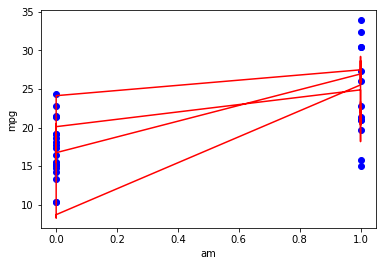

In [73]:
plt.plot(mtcars.am, mtcars.mpg,'ob')
plt.plot(mtcars.am, model.predict(mtcars),'r')
plt.xlabel('am')
plt.ylabel('mpg')

## Ex: Multiple Regression Model

In [39]:
college = pd.read_csv('./data/college.csv')

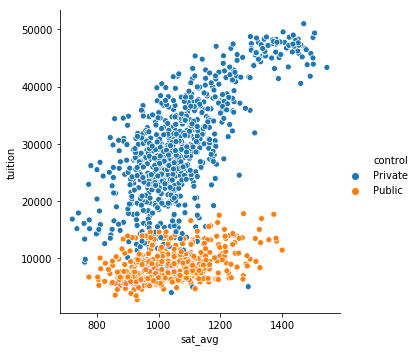

In [40]:
import seaborn as sns
sns.relplot('sat_avg','tuition',hue='control',data=college)

In [41]:
# college.nunique()

In [42]:
model = ols('tuition ~ sat_avg + control', college).fit()

In [43]:
model.params

Intercept           -10194.878929
control[T.Public]   -19108.975916
sat_avg                 36.657748
dtype: float64

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tuition   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     2261.
Date:                Thu, 08 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:57:12   Log-Likelihood:                -12812.
No. Observations:                1269   AIC:                         2.563e+04
Df Residuals:                    1266   BIC:                         2.564e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.019e+04   1358.004     -7.507      0.000   -1.29e+04   -7530.693
control[T.Public] -1.911e+04    339.417    -56.299      0.000   -1.98e+04   -1.84e+04
sat_avg              36.6577      1.250     29.333      0.000      34.206      39.110
==============================================================================
Omnibus:                      102.070   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.084
Skew:                          -0.601   Prob(JB):                     1.73e-35
Kurtosis:                       4.258   Cond. No.                     8.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
import seaborn as sns

/Users/anqitu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


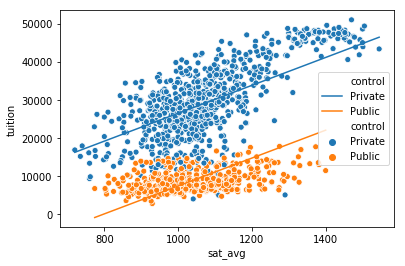

In [46]:
sns.scatterplot('sat_avg','tuition',
            hue='control',data=college)

sns.lineplot('sat_avg',model.predict(college),
             hue='control',data=college)

## Goodness of Fit

## Residues

In [47]:
model1 = ols('mpg ~ hp', mtcars).fit()
model2 = ols('mpg ~ hp+wt', mtcars ).fit()
model3 = ols('mpg ~ wt+cyl+disp', mtcars ).fit()

In [48]:
print(model1.mse_resid,model2.mse_resid,model3.mse_resid)

14.922477118153392 6.725784646257453 6.731870734163297


In [49]:
print(model1.rsquared,model2.rsquared,model3.rsquared)

0.602437341423934 0.8267854518827914 0.832607032237206


In [50]:
print(model1.fvalue,model2.fvalue,model3.fvalue)

45.4598032608238 69.21121339177772 46.42368835087047


In [40]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           1.79e-07
Time:                        14:43:37   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           9.11e-12
Time:                        18:54:11   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ex: Goodness of Fit Exercise

In [58]:
model1 = ols('tuition ~ sat_avg', college).fit()
model2 = ols('tuition ~ sat_avg + control', college).fit()

In [59]:
print(model1.mse_resid, model2.mse_resid)

120731439.35290547 34485893.95175467


In [60]:
print(model1.rsquared, model2.rsquared)

0.23357912238459044 0.7812512764710577


In [61]:
print(model1.fvalue, model2.fvalue)

386.1386826805379 2260.7311714929797


In [62]:
# model1.summary()

In [52]:
# model2.summary()

## AVONA

In [64]:
from statsmodels.stats.api import anova_lm

In [65]:
anova_lm(model1)

,df,sum_sq,mean_sq,F,PR(>F)
sat_avg,1.0,4.661908e+10,4.661908e+10,386.138683,2.986652e-75
Residual,1267.0,1.529667e+11,1.207314e+08,NaN,NaN


In [66]:
anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
control,1.0,1.262551e+11,1.262551e+11,3661.065840,0.000000e+00
sat_avg,1.0,2.967154e+10,2.967154e+10,860.396503,9.734948e-145
Residual,1266.0,4.365914e+10,3.448589e+07,NaN,NaN


In [78]:
(3661.065840 + 860.396503) / 2

2260.7311715

In [67]:
import statsmodels.api as sm
chickwts = sm.datasets.get_rdataset("chickwts").data

In [83]:
chickwts.describe()

,weight
count,71.000000
mean,261.309859
std,78.073700
min,108.000000
25%,204.500000
50%,258.000000
75%,323.500000
max,423.000000


In [71]:
# chickwts.boxplot('weight','feed')

In [72]:
model = ols('weight ~ feed', chickwts).fit()

In [73]:
model.fvalue

15.364799774712546

In [79]:
model.mse_resid ** 0.5

54.850288688065895

In [75]:
from statsmodels.stats.api import anova_lm

In [77]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
feed,5.0,231129.162103,46225.832421,15.3648,5.936420e-10
Residual,65.0,195556.020996,3008.554169,NaN,NaN


## Ex ANOVA

In [87]:
model1 = ols('tuition ~ region', college).fit()

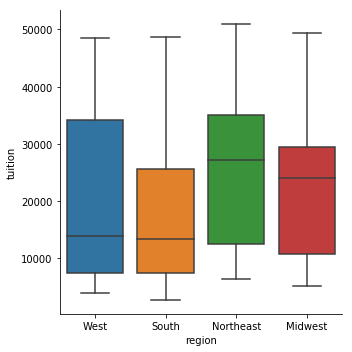

In [88]:
sns.catplot(x = 'region', y = 'tuition', data = college, kind = 'box')

In [89]:
# college.boxplot('tuition','region')

In [90]:
anova_lm(model1)

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,1.240011e+10,4.133370e+09,27.933294,1.719599e-17
Residual,1265.0,1.871857e+11,1.479729e+08,NaN,NaN


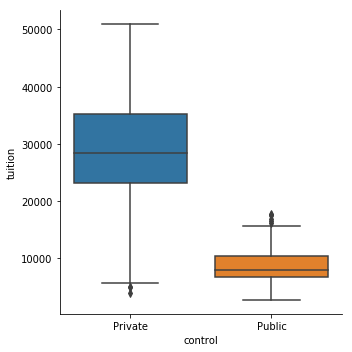

In [91]:
sns.catplot(x = 'control', y = 'tuition', data = college, kind = 'box')

In [92]:
# college.boxplot('tuition','control')

In [97]:
model2 = ols('tuition ~ control', college).fit()
anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
control,1.0,1.262551e+11,1.262551e+11,2181.423086,9.464090e-278
Residual,1267.0,7.333068e+10,5.787741e+07,NaN,NaN


In [94]:
cor_df = mtcars.corr()['mpg'].reset_index()
cor_df

,index,mpg
0,mpg,1.000000
1,cyl,-0.852162
2,disp,-0.847551
3,hp,-0.776168
4,drat,0.681172
5,wt,-0.867659
6,qsec,0.418684
7,vs,0.664039
8,am,0.599832
9,gear,0.480285


In [95]:
cor_df[cor_df['mpg'].abs() > 0.8]['index']

0     mpg
1     cyl
2    disp
5      wt
Name: index, dtype: object